# Importing libraries

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# Preparation the dataset

In [2]:
# Importing the cvs file
dataset = pd.read_csv('Porcelana_adelphi_Total_2020_SCALED.csv') # Read the data from csv file

dataset = dataset.set_index('date')
dataset.head(10)

,Sales_COP,Quantity,Quantity_pieces,Average_price_per_QuantityPieces,Average_price_Quantity,Seasonal,trend_short,trend_long,Commercial_loans,Offshore_commercial_loans,...,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
date,,,,,,,,,,,,,,,,,,,,,
2012-01-31,-1.087541,-0.463424,-0.846819,-0.925511,-1.274854,1.432421,NaN,NaN,115544.6225,13369.50425,...,114701.000,3277845.000,3193324.000,6.592078e+06,1655794.000,1.379582e+06,5.062780e+05,2.0,5.0,24.0
2012-02-29,-0.935878,-0.368739,-0.536927,-1.156462,-1.128238,1.434762,NaN,NaN,118057.9378,12567.78206,...,188117.000,4208954.000,3657193.000,8.548638e+06,1708864.000,1.372362e+06,6.711830e+05,1.0,4.0,24.0
2012-03-31,-0.950663,-0.227989,-0.780847,-0.708557,-1.335640,-0.277288,NaN,NaN,119329.8735,12161.47156,...,255871.000,5357903.000,4548666.000,1.083368e+07,2217636.000,1.418436e+06,9.071190e+05,1.0,4.0,26.0
2012-04-30,-1.783516,-1.485139,-1.700819,-0.981796,-1.161631,-1.696389,NaN,NaN,120398.3933,12038.97524,...,188951.000,3883559.000,3729477.000,8.056819e+06,1817929.000,1.119151e+06,6.597370e+05,0.0,5.0,25.0
2012-05-31,-1.677010,-1.308866,-1.844826,-0.258915,-1.214195,-0.906402,NaN,NaN,122045.6620,12841.55681,...,206678.000,4534768.000,3772980.000,9.034749e+06,1889468.000,9.084020e+05,7.115270e+05,3.0,4.0,24.0
2012-06-30,-1.511456,-0.775380,-1.173231,-1.385366,-1.651999,-1.058733,NaN,NaN,124276.1970,12224.25151,...,266174.000,6029922.000,5070629.000,1.088823e+07,2439291.000,1.330271e+06,1.090035e+06,2.0,4.0,24.0
2012-07-31,-1.219232,-0.646830,-0.853749,-1.254446,-1.270570,0.197460,-1.766607,NaN,125595.6062,12500.44388,...,204567.000,4428232.000,3994002.000,8.491320e+06,1898220.000,1.172841e+06,7.514760e+05,1.0,5.0,25.0
2012-08-31,-0.469109,0.411441,0.473798,-1.804721,-1.306867,1.092847,-1.768401,NaN,125501.6532,13139.30001,...,275914.000,5671993.000,4814315.000,1.032418e+07,2420157.000,1.027100e+06,9.739550e+05,2.0,4.0,25.0
2012-09-30,-1.420441,-0.699802,-1.006972,-1.479392,-1.578457,-0.357839,-1.506796,NaN,126817.7756,13248.67648,...,254797.843,4866254.916,4269415.413,9.485807e+06,1963631.187,9.580722e+05,8.411999e+05,1.0,5.0,24.0


In [3]:
corr = dataset.corr()['Quantity'] #Sort the correlation coefficients of quantity
corr = corr.to_frame() #Convert the series type into DataFrame
df = corr
df['temp_sort'] = abs(df['Quantity']) # Sort the Quantity by absolute value
new_df = df.sort_values(by=['temp_sort'],ascending = False).drop(columns=['temp_sort']) #Sort in decreasing order depending on 'temp_sort'

In [4]:
# Select the 41 strongest features (Include 'Quantity')
features = new_df[0:41]
features

,Quantity
Quantity,1.000000
Quantity_pieces,0.961837
Sales_COP,0.800840
Housing_total_sales_NO_SI,0.788109
Gray_cement_dispatch_contractor,0.702473
Gray_cement_dispatch,0.647452
Gray_cement_dispatch_Factory,0.639393
Housing_total_sales_NO_SIlag_1,0.585004
Gray_cement_dispatch_other,0.578471
Housing_total_sales,0.568865


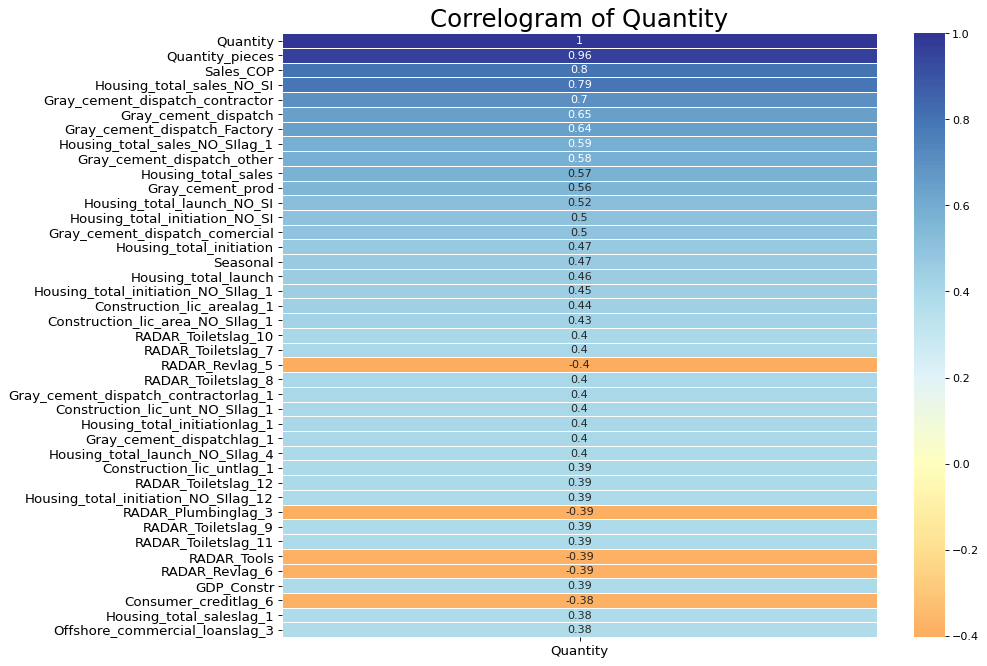

In [5]:
plt.figure(figsize=(12, 10), dpi=80)

fig = sns.heatmap(features, xticklabels=features.columns, yticklabels=features.index,
                  linewidths=0.5, cmap='RdYlBu', center=0, annot=True)


# Decorations
plt.title('Correlogram of Quantity', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

fig.figure.savefig('heatmap_quantity.png', bbox_inches='tight')  # Save fig

In [6]:
rows = features._stat_axis.values.tolist()
Quantity_41 = dataset[rows] 
Quantity_41.head(5)

,Quantity,Quantity_pieces,Sales_COP,Housing_total_sales_NO_SI,Gray_cement_dispatch_contractor,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Housing_total_sales_NO_SIlag_1,Gray_cement_dispatch_other,Housing_total_sales,...,Housing_total_initiation_NO_SIlag_12,RADAR_Plumbinglag_3,RADAR_Toiletslag_9,RADAR_Toiletslag_11,RADAR_Tools,RADAR_Revlag_6,GDP_Constr,Consumer_creditlag_6,Housing_total_saleslag_1,Offshore_commercial_loanslag_3
date,,,,,,,,,,,,,,,,,,,,,
2012-01-31,-0.463424,-0.846819,-1.087541,6046.0,138289.8150,823283.7175,167426.3735,4823.0,47567.5200,10161.0,...,4983.0,2.514968e+10,1.064250e+11,NaN,8.385283e+10,1.229926e+11,12206.72289,2474585.000,8493.0,13431.29604
2012-02-29,-0.368739,-0.536927,-0.935878,5929.0,156313.9750,846615.0595,185798.7680,6046.0,50254.1095,10976.0,...,5632.0,2.372993e+10,9.899854e+10,1.163724e+11,8.974910e+10,9.980875e+10,12206.72289,3057395.000,10161.0,14523.13342
2012-03-31,-0.227989,-0.780847,-0.950663,6346.0,172760.0650,950452.8920,206963.7675,5929.0,51593.8570,11382.0,...,4915.0,3.274931e+10,5.888280e+10,1.064250e+11,1.005891e+11,1.244908e+11,12206.72289,2714678.177,10976.0,14067.69581
2012-04-30,-1.485139,-1.700819,-1.783516,6199.0,138718.1725,789541.9885,173980.3210,6346.0,43421.0915,10457.0,...,4323.0,2.667609e+10,6.732315e+10,9.899854e+10,1.084703e+11,1.595196e+11,13162.41255,2540906.000,11382.0,13369.50425
2012-05-31,-1.308866,-1.844826,-1.677010,5755.0,166544.1285,904690.5645,208186.2325,6199.0,50131.4990,10445.0,...,4538.0,2.809644e+10,6.103446e+10,5.888280e+10,1.082117e+11,1.875095e+11,13162.41255,3411416.000,10457.0,12567.78206


In [7]:
# Drop NaN
Quantity_41 = Quantity_41.dropna()

print('After drop Nan:')
print(Quantity_41.isnull().sum())

After drop Nan:
Quantity                                0
Quantity_pieces                         0
Sales_COP                               0
Housing_total_sales_NO_SI               0
Gray_cement_dispatch_contractor         0
Gray_cement_dispatch                    0
Gray_cement_dispatch_Factory            0
Housing_total_sales_NO_SIlag_1          0
Gray_cement_dispatch_other              0
Housing_total_sales                     0
Gray_cement_prod                        0
Housing_total_launch_NO_SI              0
Housing_total_initiation_NO_SI          0
Gray_cement_dispatch_comercial          0
Housing_total_initiation                0
Seasonal                                0
Housing_total_launch                    0
Housing_total_initiation_NO_SIlag_1     0
Construction_lic_arealag_1              0
Construction_lic_area_NO_SIlag_1        0
RADAR_Toiletslag_10                     0
RADAR_Toiletslag_7                      0
RADAR_Revlag_5                          0
RADAR_Toiletslag_8

In [8]:
Quantity_41

,Quantity,Quantity_pieces,Sales_COP,Housing_total_sales_NO_SI,Gray_cement_dispatch_contractor,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Housing_total_sales_NO_SIlag_1,Gray_cement_dispatch_other,Housing_total_sales,...,Housing_total_initiation_NO_SIlag_12,RADAR_Plumbinglag_3,RADAR_Toiletslag_9,RADAR_Toiletslag_11,RADAR_Tools,RADAR_Revlag_6,GDP_Constr,Consumer_creditlag_6,Housing_total_saleslag_1,Offshore_commercial_loanslag_3
date,,,,,,,,,,,,,,,,,,,,,
2012-03-31,-0.227989,-0.780847,-0.950663,6346.0,172760.065000,9.504529e+05,206963.767500,5929.0,51593.857000,11382.0,...,4915.0,3.274931e+10,5.888280e+10,1.064250e+11,1.005891e+11,1.244908e+11,12206.722890,2.714678e+06,10976.0,14067.695810
2012-04-30,-1.485139,-1.700819,-1.783516,6199.0,138718.172500,7.895420e+05,173980.321000,6346.0,43421.091500,10457.0,...,4323.0,2.667609e+10,6.732315e+10,9.899854e+10,1.084703e+11,1.595196e+11,13162.412550,2.540906e+06,11382.0,13369.504250
2012-05-31,-1.308866,-1.844826,-1.677010,5755.0,166544.128500,9.046906e+05,208186.232500,6199.0,50131.499000,10445.0,...,4538.0,2.809644e+10,6.103446e+10,5.888280e+10,1.082117e+11,1.875095e+11,13162.412550,3.411416e+06,10457.0,12567.782060
2012-06-30,-0.775380,-1.173231,-1.511456,6156.0,162288.615500,8.792193e+05,202304.632500,5755.0,46087.412500,11095.0,...,4298.0,2.829731e+10,7.382728e+10,6.732315e+10,9.805886e+10,2.649794e+11,13162.412550,2.814197e+06,10445.0,12161.471560
2012-07-31,-0.646830,-0.853749,-1.219232,6205.0,167330.420500,8.796326e+05,199361.387500,6156.0,50862.005500,11780.0,...,5402.0,2.819863e+10,9.989292e+10,6.103446e+10,1.062604e+11,2.151357e+11,11417.166760,1.860872e+06,11095.0,12038.975240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-31,-2.384584,-2.423475,-1.624675,2756.0,127786.663946,7.059210e+05,120749.274517,1864.0,38729.302995,9571.0,...,2507.0,4.096550e+10,7.028930e+10,7.969561e+10,1.261398e+11,1.328923e+11,9826.731881,8.268486e+06,6301.0,17575.124570
2020-06-30,-1.585970,-1.754690,-0.912205,4571.0,162568.108989,9.049548e+05,178289.625725,2756.0,48678.506489,14737.0,...,5540.0,6.917494e+10,6.866832e+10,9.315838e+10,1.262421e+11,2.284194e+11,9826.731881,7.945281e+06,9571.0,23060.643353
2020-07-31,-0.401527,-0.522785,0.147880,5011.0,194331.339929,1.092613e+06,209398.826814,4571.0,60127.073463,17074.0,...,3964.0,5.161171e+10,1.609714e+11,7.028930e+10,1.162451e+11,1.564526e+11,10385.250891,8.392617e+06,14737.0,23071.363362


# Transform data

In [9]:
# Standardize the data
Quantity_41Std = (Quantity_41-Quantity_41.mean())/Quantity_41.std()
Quantity_41Std.head(5)

,Quantity,Quantity_pieces,Sales_COP,Housing_total_sales_NO_SI,Gray_cement_dispatch_contractor,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Housing_total_sales_NO_SIlag_1,Gray_cement_dispatch_other,Housing_total_sales,...,Housing_total_initiation_NO_SIlag_12,RADAR_Plumbinglag_3,RADAR_Toiletslag_9,RADAR_Toiletslag_11,RADAR_Tools,RADAR_Revlag_6,GDP_Constr,Consumer_creditlag_6,Housing_total_saleslag_1,Offshore_commercial_loanslag_3
date,,,,,,,,,,,,,,,,,,,,,
2012-03-31,-0.193668,-0.766459,-0.949771,0.007960,-0.648801,-0.241570,-0.432678,-0.386198,-0.059016,-1.296691,...,-0.421798,-0.780557,-2.049194,-0.833269,1.015964,-1.004651,-1.041700,-1.155785,-1.485409,-1.457522
2012-04-30,-1.476294,-1.713092,-1.844794,-0.132725,-1.841713,-1.610946,-1.435837,0.013053,-1.081627,-1.697092,...,-0.919688,-1.254980,-1.837029,-1.023998,1.569878,-0.034285,-0.370960,-1.252498,-1.301331,-1.666407
2012-05-31,-1.296448,-1.861272,-1.730338,-0.557652,-0.866623,-0.631014,-0.395498,-0.127690,-0.241992,-1.702286,...,-0.738867,-1.144027,-1.995107,-2.054260,1.551699,0.741088,-0.370960,-0.768014,-1.720720,-1.906267
2012-06-30,-0.752151,-1.170215,-1.552426,-0.173878,-1.015747,-0.847779,-0.574381,-0.552792,-0.748006,-1.420923,...,-0.940714,-1.128335,-1.673535,-1.837493,0.838128,2.887152,-0.370960,-1.100398,-1.726161,-2.027827
2012-07-31,-0.620996,-0.841474,-1.238388,-0.126983,-0.839069,-0.844262,-0.663897,-0.168860,-0.150588,-1.124410,...,-0.012216,-1.136044,-1.018324,-1.999000,1.414558,1.506387,-1.595842,-1.630973,-1.431455,-2.064476


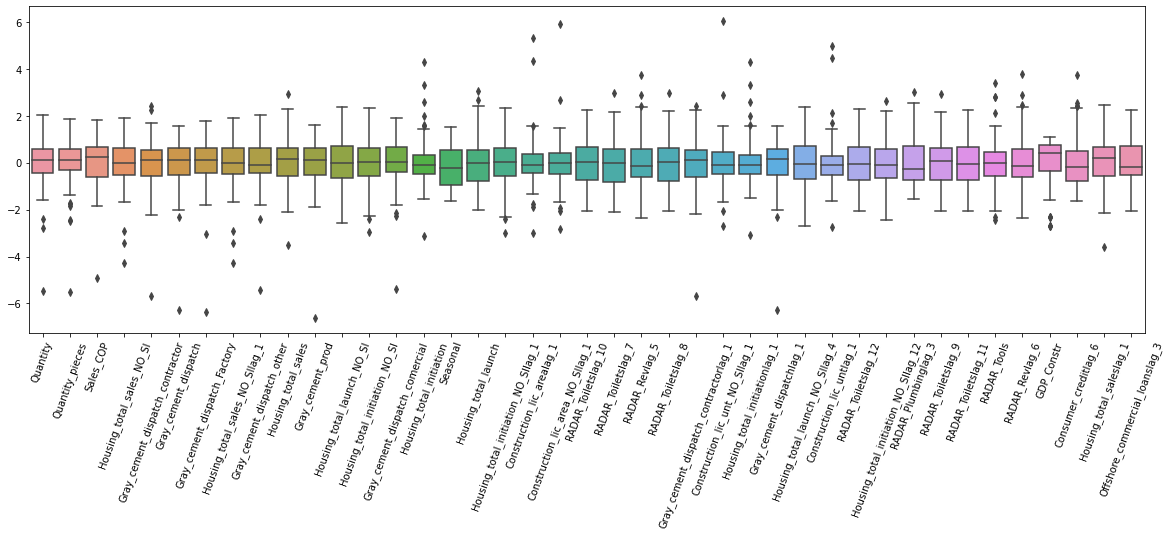

In [10]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=70)
sns.boxplot(x="variable", y="value",data = Quantity_41Std.melt()) #Explore melt function of pandas
plt.xlabel('') #Erase labels
plt.ylabel('') #Erase label
plt.show()

Data split

In [11]:
# Define features X
#X = Quantity_41Std.iloc[:-9,3:41]
feature_cols = ['Housing_total_sales_NO_SI','Gray_cement_dispatch_contractor','Gray_cement_dispatch_Factory','Housing_total_sales_NO_SIlag_1','Gray_cement_dispatch_other','Housing_total_launch_NO_SI','Seasonal','Construction_lic_arealag_1','Construction_lic_area_NO_SIlag_1','RADAR_Toiletslag_7','RADAR_Revlag_5','Housing_total_launch_NO_SIlag_4','RADAR_Tools']
#feature_cols = ['Housing_total_sales_NO_SI','Gray_cement_dispatch_Factory','Housing_total_sales_NO_SIlag_1','Housing_total_launch_NO_SI','Seasonal','Construction_lic_arealag_1','Construction_lic_area_NO_SIlag_1','RADAR_Toiletslag_7','RADAR_Revlag_5','Housing_total_launch_NO_SIlag_4']
X = Quantity_41Std[feature_cols].iloc[:-9,:]
X

,Housing_total_sales_NO_SI,Gray_cement_dispatch_contractor,Gray_cement_dispatch_Factory,Housing_total_sales_NO_SIlag_1,Gray_cement_dispatch_other,Housing_total_launch_NO_SI,Seasonal,Construction_lic_arealag_1,Construction_lic_area_NO_SIlag_1,RADAR_Toiletslag_7,RADAR_Revlag_5,Housing_total_launch_NO_SIlag_4,RADAR_Tools
date,,,,,,,,,,,,,
2012-03-31,0.007960,-0.648801,-0.432678,-0.386198,-0.059016,1.134350,-0.216457,-0.668934,-0.575198,-2.101985,-0.032290,-0.881999,1.015964
2012-04-30,-0.132725,-1.841713,-1.435837,0.013053,-1.081627,-0.681952,-1.645101,-1.111999,-0.917851,-1.771557,0.741641,-1.532096,1.569878
2012-05-31,-0.557652,-0.866623,-0.395498,-0.127690,-0.241992,-0.697699,-0.849802,-1.042150,-0.778682,-1.098304,2.883714,1.120399,1.551699
2012-06-30,-0.173878,-1.015747,-0.574381,-0.552792,-0.748006,-0.202894,-1.003157,0.114968,0.991822,-0.483985,1.505517,-0.530277,0.838128
2012-07-31,-0.126983,-0.839069,-0.663897,-0.168860,-0.150588,0.558996,0.261484,0.214724,-0.055626,0.450540,0.918390,1.112955,1.414558
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,-0.342317,0.355959,0.971997,-0.500133,1.085611,-0.156866,1.162892,0.267541,-0.458021,-1.666365,-0.142353,-0.839197,-0.737524
2019-09-30,-0.638043,0.304317,0.408979,-0.337368,0.683705,-0.285866,-0.297549,-0.464105,-0.384624,-0.806876,-0.340694,-0.720095,-0.168173
2019-10-31,-0.962480,0.939420,0.877840,-0.633216,1.314512,-1.628561,0.443396,-0.587362,-0.630894,-0.844428,-0.389870,-1.274042,-1.258921


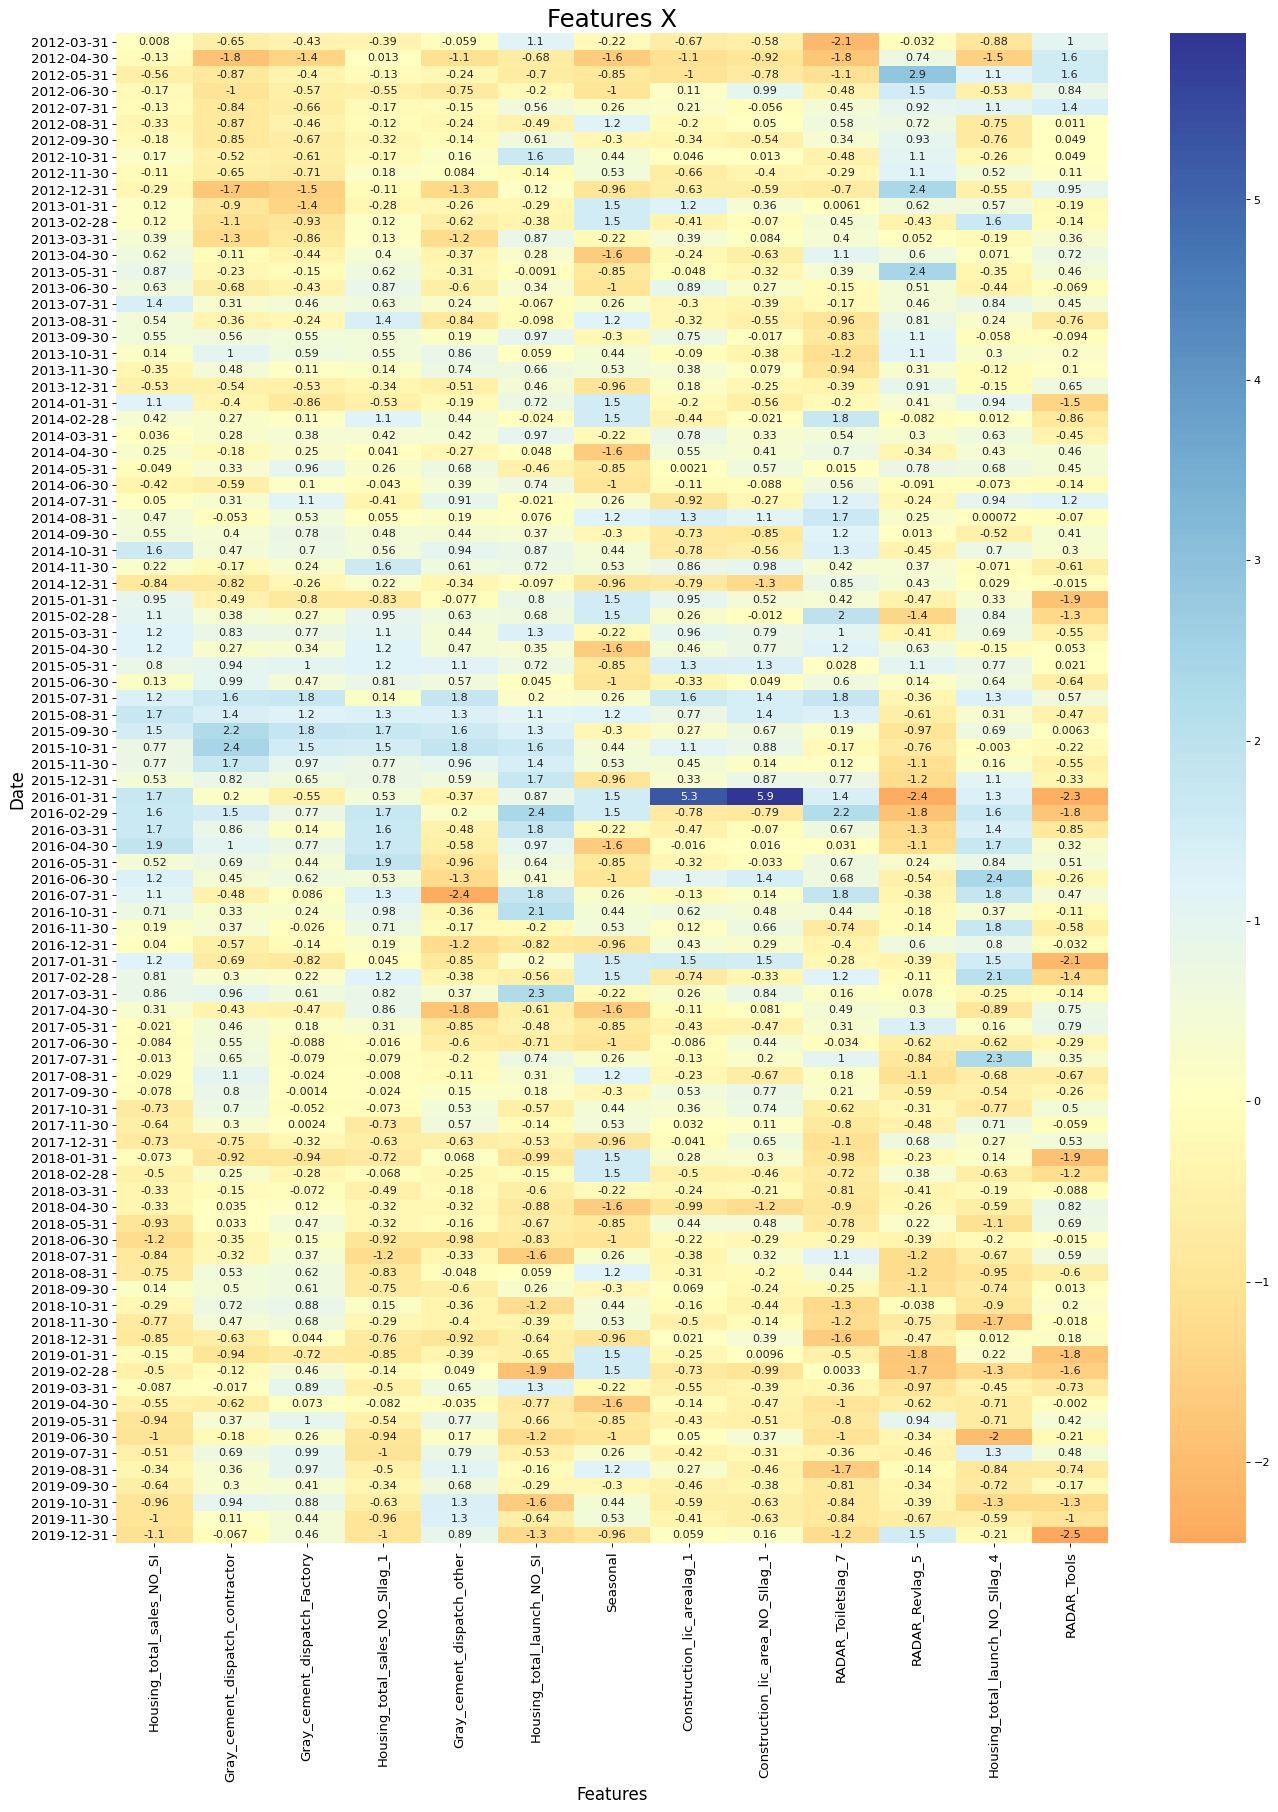

In [12]:
#X_13features Heatmap
plt.figure(figsize=(20, 25), dpi=80)

fig = sns.heatmap(X, xticklabels=X.columns, yticklabels=X.index,cmap='RdYlBu', center=0, annot=True)


# Decorations
plt.title('Features X', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Features',fontsize=15)
plt.ylabel('Date',fontsize=15)

plt.show()

fig.figure.savefig('heatmap_13features.png', bbox_inches='tight')  # Save fig

In [13]:
# Definition y = "Quantity"
y = Quantity_41Std.iloc[:-9,0] # Target variable
y = y.to_frame()
y

,Quantity
date,
2012-03-31,-0.193668
2012-04-30,-1.476294
2012-05-31,-1.296448
2012-06-30,-0.752151
2012-07-31,-0.620996
...,...
2019-08-31,0.435502
2019-09-30,-0.001558
2019-10-31,0.204952


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

X_train.sort_values('date', inplace=True)
X_test.sort_values('date', inplace=True)
y_train.sort_values('date', inplace=True)
y_test.sort_values('date', inplace=True)

print(X_train.shape)
print(X_test.shape)

(64, 13)
(28, 13)


<ipython-input-14-ab167c2311c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.sort_values('date', inplace=True)
<ipython-input-14-ab167c2311c1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.sort_values('date', inplace=True)
<ipython-input-14-ab167c2311c1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.sort_values('date', inplace=True)
<ipython-input-14-ab167c2311c1>:6: SettingWithCopyWarning: 
A value is 

# Multiple Linear Regression

Training and predicting

In [15]:
LinearReg = LinearRegression()  
LinearReg.fit(X_train, y_train)

y_pred_Train = LinearReg.predict(X_train) 
y_pred_Test  = LinearReg.predict(X_test)  

print('Intercept:',LinearReg.intercept_)
print('Coefficients:', LinearReg.coef_)

Intercept: [-0.07717756]
Coefficients: [[ 0.03161226 -0.0665485   0.24406001  0.21678599  0.11957794  0.15063265
   0.27249119  0.05858181  0.05276663 -0.02015279 -0.11010167  0.12878458
  -0.12181658]]


Validation plots

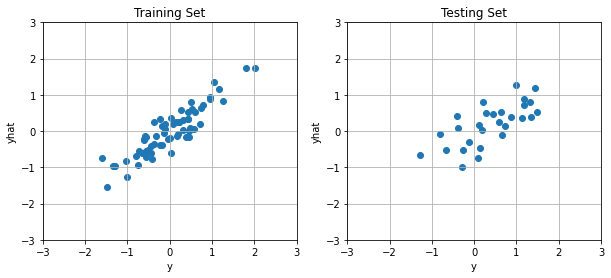

In [16]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

ax[0].scatter(y_train, y_pred_Train)
ax[0].set_ylim(-3,3)
ax[0].set_xlim(-3,3)
ax[0].grid()
ax[0].set_xlabel('y')
ax[0].set_ylabel('yhat')
ax[0].set_title('Training Set')


ax[1].scatter(y_test, y_pred_Test)
ax[1].set_ylim(-3,3)
ax[1].set_xlim(-3,3)
ax[1].grid()
ax[1].set_xlabel('y')
ax[1].set_ylabel('yhat')
ax[1].set_title('Testing Set')

plt.savefig('Linear_pairplot.png',dpi= 80)# Save fig
plt.show()

Line Chart for training and test set

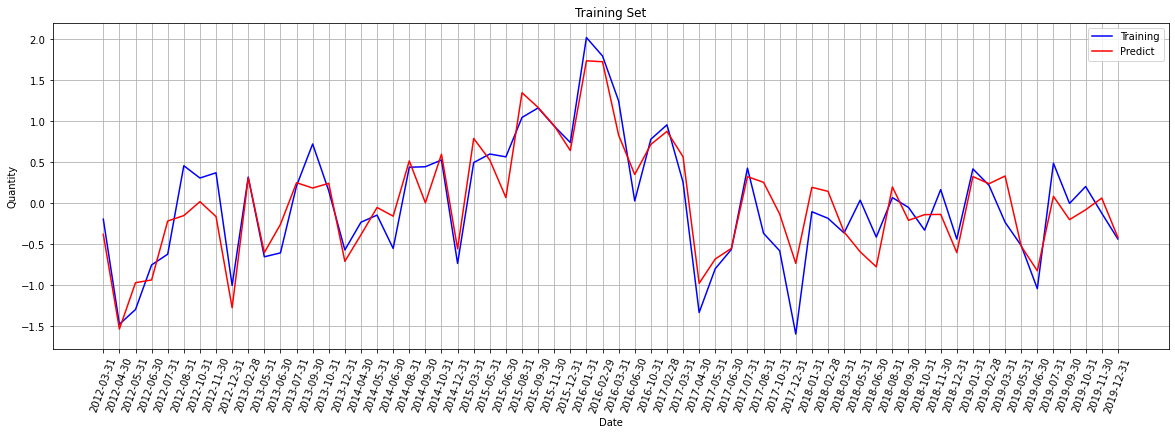

In [17]:
plt.figure(figsize=(20,6))
plt.plot(y_train.index,y_train,color ='blue',label='Training')
plt.plot(y_train.index,y_pred_Train,color ='red',label='Predict')
plt.grid()
plt.xlabel('Date')
plt.xticks(rotation=70)
plt.ylabel('Quantity')
plt.title('Training Set')
plt.legend()

plt.savefig('Linear_TRA_line.png',dpi= 80)# Save fig
plt.show()

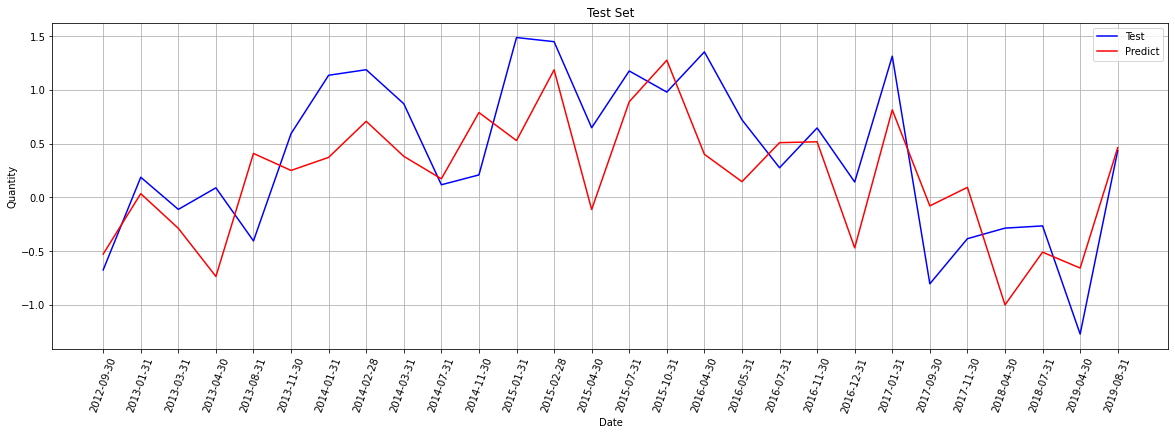

In [18]:
plt.figure(figsize=(20,6))
plt.plot(y_test.index,y_test,color ='blue',label='Test')
plt.plot(y_test.index,y_pred_Test,color ='red',label='Predict')
plt.grid()
plt.xlabel('Date')
plt.xticks(rotation=70)
plt.ylabel('Quantity')
plt.legend()
plt.title('Test Set')

plt.savefig('Linear_TES_line.png',dpi= 80)
plt.show()

Metrics

In [19]:
print('Training Metrics:')
print('R squared:', metrics.r2_score(y_train, y_pred_Train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_Train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_Train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_Train)))

print('\nTesting Metrics:')
print('R squared:', metrics.r2_score(y_test, y_pred_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))

Training Metrics:
R squared: 0.8210648872246036
Mean Absolute Error: 0.2407604365907902
Mean Squared Error: 0.09435213188025961
Root Mean Squared Error: 0.30716792130731946

Testing Metrics:
R squared: 0.43846829705770385
Mean Absolute Error: 0.4714380005002932
Mean Squared Error: 0.2967076783637816
Root Mean Squared Error: 0.5447088014377789


# Ridge Regression

<font color = 'blue'> Training and predicting

In [20]:
RidgeReg = Ridge(normalize=True,alpha = 0.01)  #Default value for alpha = 0.01
RidgeReg.fit(X_train, y_train)

y_pred_Train = RidgeReg.predict(X_train) #Predictions on training model
y_pred_Test  = RidgeReg.predict(X_test)  #Predictions on testing model

print('Intercept:',RidgeReg.intercept_)                                         
print('Coefficients:', RidgeReg.coef_)


Intercept: [-0.07423598]
Coefficients: [[ 0.04401854 -0.04670098  0.2225438   0.19965925  0.12230539  0.14626832
   0.26527837  0.05776042  0.05074038 -0.01430983 -0.10804042  0.12603027
  -0.1221079 ]]


<font color = 'blue'>Validation plots

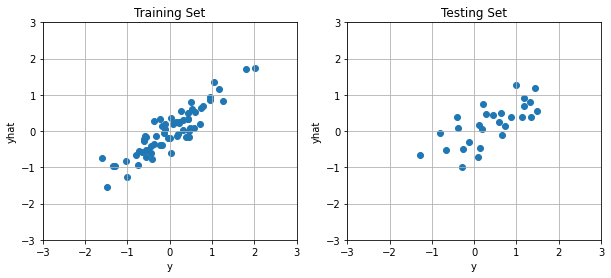

In [21]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

ax[0].scatter(y_train, y_pred_Train)
ax[0].set_ylim(-3,3)
ax[0].set_xlim(-3,3)
ax[0].grid()
ax[0].set_xlabel('y')
ax[0].set_ylabel('yhat')
ax[0].set_title('Training Set')

ax[1].scatter(y_test, y_pred_Test)
ax[1].set_ylim(-3,3)
ax[1].set_xlim(-3,3)
ax[1].grid()
ax[1].set_xlabel('y')
ax[1].set_ylabel('yhat')
ax[1].set_title('Testing Set')

plt.savefig('Ridge_pairplot.png',dpi= 80)# Save fig
plt.show()

<font color = 'blue'>Line Chart for training and test set

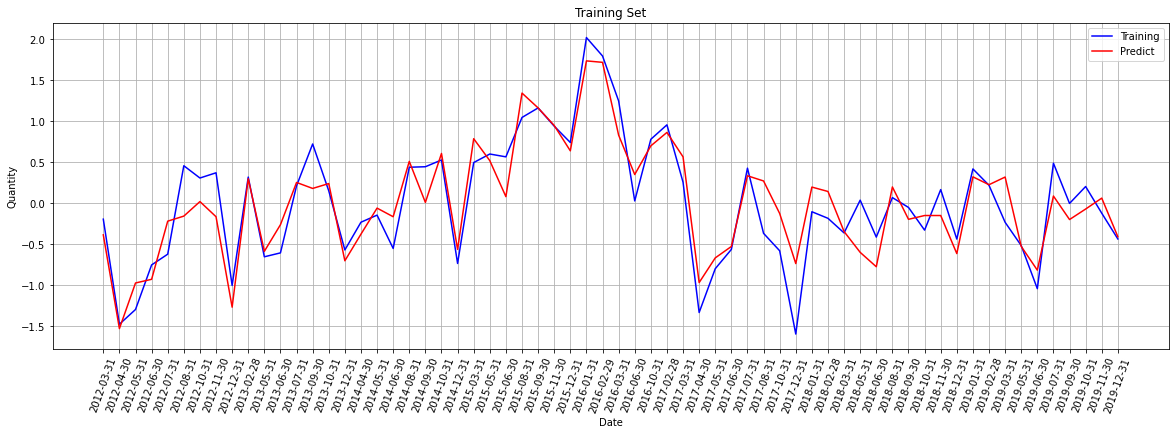

In [22]:
plt.figure(figsize=(20,6))
plt.plot(y_train.index,y_train,color ='blue',label='Training')
plt.plot(y_train.index,y_pred_Train,color ='red',label='Predict')
plt.grid()
plt.xlabel('Date')
plt.xticks(rotation=70)
plt.ylabel('Quantity')
plt.title('Training Set')
plt.legend()

plt.savefig('Ridge_TRA_line.png',dpi= 80)# Save fig
plt.show()

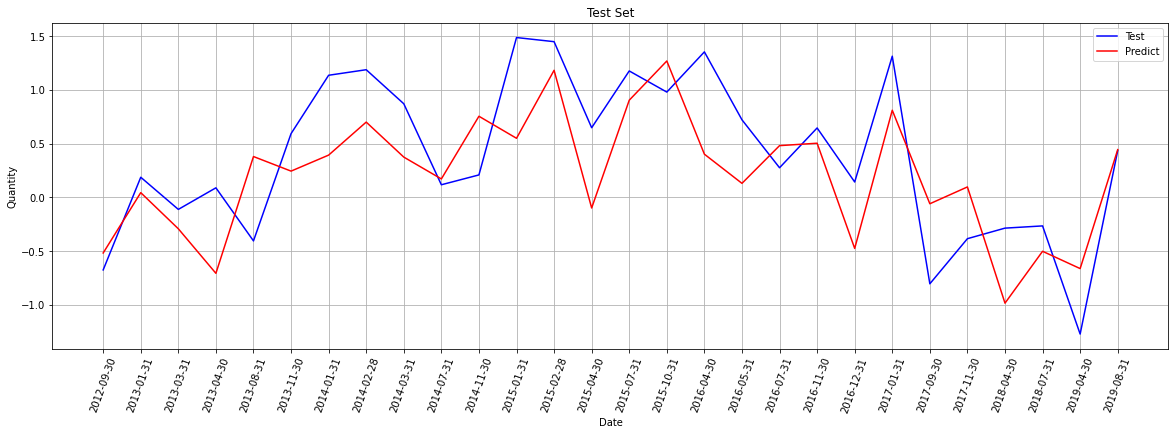

In [23]:
plt.figure(figsize=(20,6))
plt.plot(y_test.index,y_test,color ='blue',label='Test')
plt.plot(y_test.index,y_pred_Test,color ='red',label='Predict')
plt.grid()
plt.xlabel('Date')
plt.xticks(rotation=70)
plt.ylabel('Quantity')
plt.legend()
plt.title('Test Set')

plt.savefig('Ridge_TES_line.png',dpi= 80)# Save fig
plt.show()

<font color = 'blue'>Metrics

In [24]:
print('Training Metrics:')
print('R squared:', metrics.r2_score(y_train, y_pred_Train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_Train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_Train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_Train)))

print('\nTesting Metrics:')
print('R squared:', metrics.r2_score(y_test, y_pred_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))

Training Metrics:
R squared: 0.820936212211049
Mean Absolute Error: 0.2416374946482847
Mean Squared Error: 0.09441998196099721
Root Mean Squared Error: 0.3072783460659036

Testing Metrics:
R squared: 0.4519434970117129
Mean Absolute Error: 0.46581857507024227
Mean Squared Error: 0.2895875188556146
Root Mean Squared Error: 0.5381333653060499


Text(0, 0.5, 'MSE')

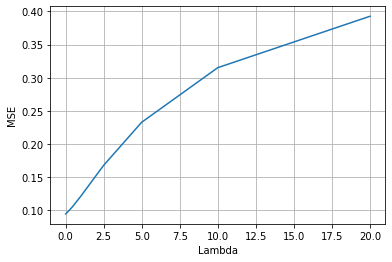

In [25]:
#Parameter Settings

alphas = [0.01, 0.1, 0.25, 0.5, 1, 2.5, 5, 10, 20]

#alphas = 10**np.linspace(10,-2,100)*and0.5 #create alpha coefficients #More values

RidgeReg = Ridge(normalize=True) #Define ridge model
MSE = [] #Store MSE values

for a in alphas:
    RidgeReg.set_params(alpha = a)
    RidgeReg.fit(X_train, y_train)
    y_pred_Train = RidgeReg.predict(X_train) #Predictions on training model
    MSE.append(metrics.mean_squared_error(y_train, y_pred_Train)) 

plt.plot(alphas,MSE)
plt.grid()
plt.xlabel('Lambda')
plt.ylabel('MSE')

# Lasso Regression

<font color = 'blue'> Training and predicting

In [26]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

LassoReg = Lasso(normalize=True, alpha = 0.01)  #Default value for alpha = 0.01
LassoReg.fit(X_train, y_train)

y_pred_Train = LassoReg.predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg.predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg.intercept_)
print('Coefficients:', LassoReg.coef_)

Intercept: [-0.03942653]
Coefficients: [ 1.91428793e-01  1.32190046e-01  1.97298899e-02  1.17732166e-04
  7.41470028e-02  9.28371472e-02  1.87173912e-01  1.91105163e-02
  5.49259212e-03  1.02866603e-02 -6.63315655e-02  7.04551484e-02
 -1.07617274e-01]


<font color = 'blue'>Validation plots

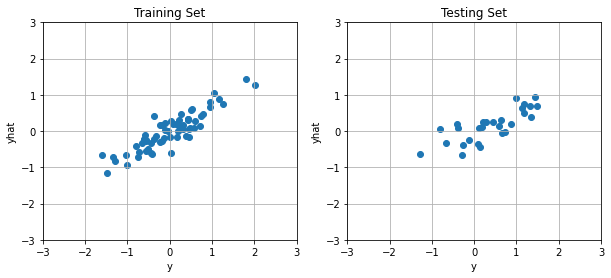

In [27]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

ax[0].scatter(y_train, y_pred_Train)
ax[0].set_ylim(-3,3)
ax[0].set_xlim(-3,3)
ax[0].grid()
ax[0].set_xlabel('y')
ax[0].set_ylabel('yhat')
ax[0].set_title('Training Set')

ax[1].scatter(y_test, y_pred_Test)
ax[1].set_ylim(-3,3)
ax[1].set_xlim(-3,3)
ax[1].grid()
ax[1].set_xlabel('y')
ax[1].set_ylabel('yhat')
ax[1].set_title('Testing Set')
plt.show()

<font color = 'blue'>Line Chart for training and test set

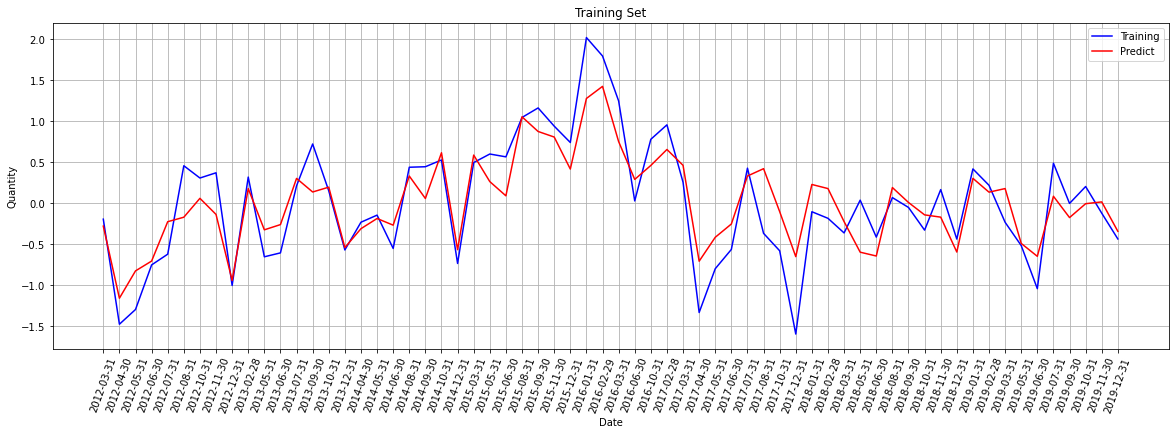

In [28]:
plt.figure(figsize=(20,6))
plt.plot(y_train.index,y_train,color ='blue',label='Training')
plt.plot(y_train.index,y_pred_Train,color ='red',label='Predict')
plt.grid()
plt.xlabel('Date')
plt.xticks(rotation=70)
plt.ylabel('Quantity')
plt.title('Training Set')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Test Set')

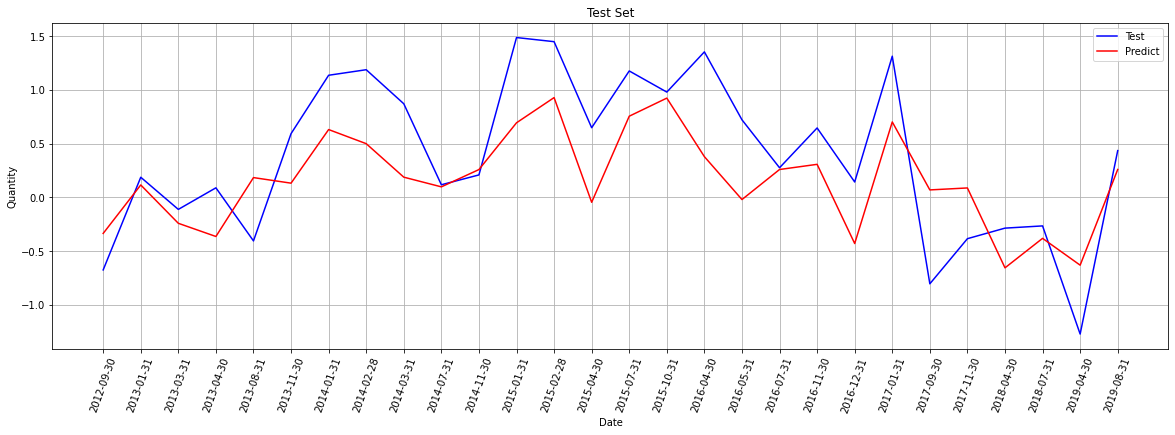

In [29]:
plt.figure(figsize=(20,6))
plt.plot(y_test.index,y_test,color ='blue',label='Test')
plt.plot(y_test.index,y_pred_Test,color ='red',label='Predict')
plt.grid()
plt.xlabel('Date')
plt.xticks(rotation=70)
plt.ylabel('Quantity')
plt.legend()
plt.title('Test Set')

<font color = 'blue'>Metrics

In [30]:
print('Training Metrics:')
print('R squared:', metrics.r2_score(y_train, y_pred_Train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_Train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_Train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_Train)))

print('\nTesting Metrics:')
print('R squared:', metrics.r2_score(y_test, y_pred_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))

Training Metrics:
R squared: 0.7687565496486861
Mean Absolute Error: 0.28255443514003026
Mean Squared Error: 0.12193421506588424
Root Mean Squared Error: 0.3491908003740709

Testing Metrics:
R squared: 0.48899018345895473
Mean Absolute Error: 0.4421298051223687
Mean Squared Error: 0.27001242404042186
Root Mean Squared Error: 0.5196271971716087


(0.0, 1.0)

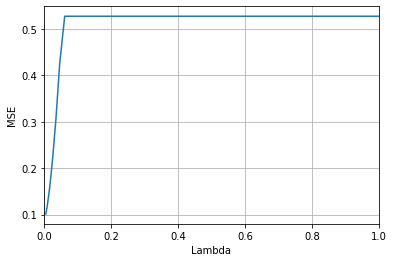

In [31]:
##Parameter Settingsn

alphas = [0.01, 0.1, 0.25, 0.5, 1, 2.5, 5, 10, 20]

alphas = 10**np.linspace(10,-2,100)*0.5 #create alpha coefficients #More values

LassoReg = Lasso(normalize=True) #Define Lasso model
MSE = [] #Store MSE values

for a in alphas:
    LassoReg.set_params(alpha = a)
    LassoReg.fit(X_train, y_train)
    y_pred_Train = LassoReg.predict(X_train) #Predictions on training model
    MSE.append(metrics.mean_squared_error(y_train, y_pred_Train)) 

plt.plot(alphas,MSE)
plt.grid()
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.xlim(0,1)

# ElasticNet Regression

<font color = 'blue'> Training and predicting

In [32]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

ElasticNetReg = ElasticNet(normalize=True, alpha = 0.01, l1_ratio=0.5)  #Default value for alpha = 0.01
ElasticNetReg.fit(X_train, y_train)

y_pred_Train = ElasticNetReg.predict(X_train) #Predictions on training model
y_pred_Test  = ElasticNetReg.predict(X_test)  #Predictions on testing model

print('Intercept:',ElasticNetReg.intercept_)
print('Coefficients:', ElasticNetReg.coef_)

Intercept: [-0.04688843]
Coefficients: [ 0.11161536  0.0817858   0.07012558  0.08123487  0.10081526  0.09202111
  0.16959132  0.0359882   0.03024365  0.03764117 -0.08206559  0.07904177
 -0.10871763]


<font color = 'blue'>Validation plots

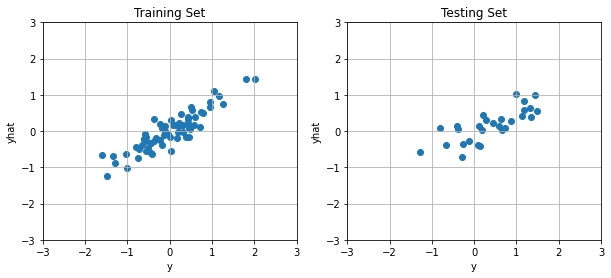

In [33]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

ax[0].scatter(y_train, y_pred_Train)
ax[0].set_ylim(-3,3)
ax[0].set_xlim(-3,3)
ax[0].grid()
ax[0].set_xlabel('y')
ax[0].set_ylabel('yhat')
ax[0].set_title('Training Set')

ax[1].scatter(y_test, y_pred_Test)
ax[1].set_ylim(-3,3)
ax[1].set_xlim(-3,3)
ax[1].grid()
ax[1].set_xlabel('y')
ax[1].set_ylabel('yhat')
ax[1].set_title('Testing Set')
plt.show()

<font color = 'blue'>Line Chart for training and test set

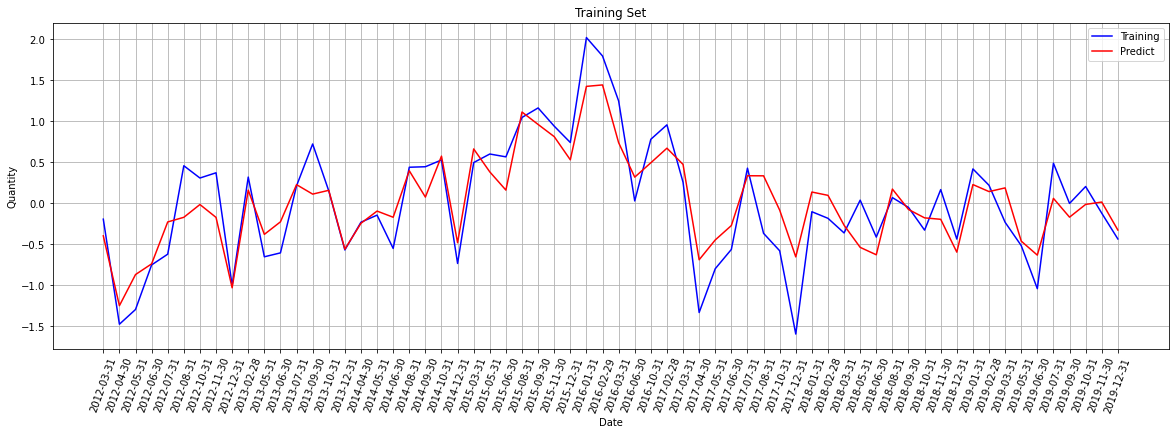

In [34]:
plt.figure(figsize=(20,6))
plt.plot(y_train.index,y_train,color ='blue',label='Training')
plt.plot(y_train.index,y_pred_Train,color ='red',label='Predict')
plt.grid()
plt.xlabel('Date')
plt.xticks(rotation=70)
plt.ylabel('Quantity')
plt.title('Training Set')
plt.legend()

#plt.savefig('ER_TRA_line.png',dpi= 80)
plt.show()

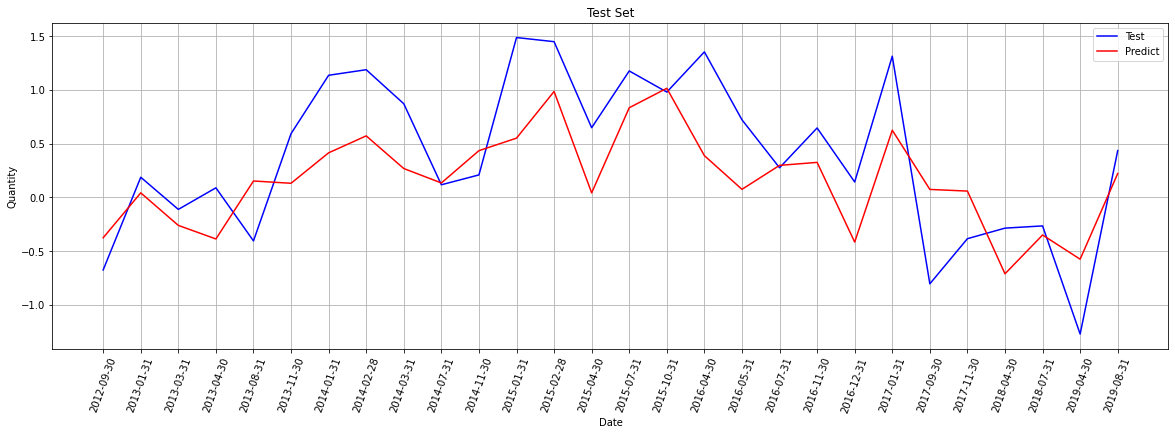

In [35]:
plt.figure(figsize=(20,6))
plt.plot(y_test.index,y_test,color ='blue',label='Test')
plt.plot(y_test.index,y_pred_Test,color ='red',label='Predict')
plt.grid()
plt.xlabel('Date')
plt.xticks(rotation=70)
plt.ylabel('Quantity')
plt.legend()
plt.title('Test Set')

#plt.savefig('ER_TES_line.png',dpi= 80)# Save fig
plt.show()

<font color = 'blue'>Metrics

In [36]:
print('Training Metrics:')
print('R squared:', metrics.r2_score(y_train, y_pred_Train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_Train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_Train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_Train)))

print('\nTesting Metrics:')
print('R squared:', metrics.r2_score(y_test, y_pred_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))

Training Metrics:
R squared: 0.7856055153082486
Mean Absolute Error: 0.2699533150642228
Mean Squared Error: 0.1130497887210534
Root Mean Squared Error: 0.33622877437996496

Testing Metrics:
R squared: 0.47923883017577584
Mean Absolute Error: 0.45000859272501975
Mean Squared Error: 0.27516494059184154
Root Mean Squared Error: 0.5245616651947048


# Run the best model with 100 times and build a box plot with R2 and MSE

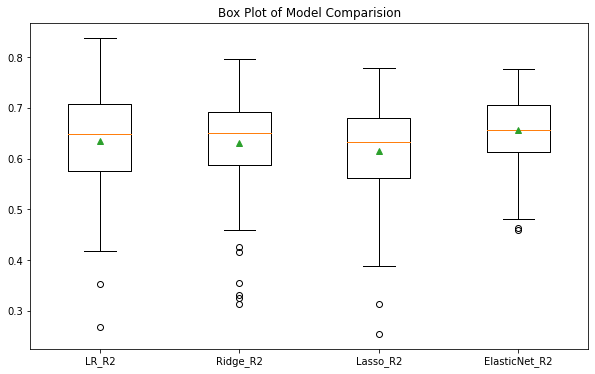

In [37]:
#R2 Boxplot

plt.figure(figsize=(10, 6))

LR_R2 = []
Ridge_R2 = []
Lasso_R2 = []
ElasticNet_R2 = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    LinearReg = LinearRegression() # Creates the function
    LinearReg.fit(X_train, y_train) # Train the model
    y_pred = LinearReg.predict(X_test)  # Predictions on testing model
    LR_R2.append(metrics.r2_score(y_test, y_pred))

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    RidgeReg = Ridge(normalize=True, alpha = 0.01) #Creates the function
    RidgeReg.fit(X_train, y_train) #Train the model
    y_pred_Test  = RidgeReg.predict(X_test)  #Predictions on testing model
    Ridge_R2.append(metrics.r2_score(y_test, y_pred_Test))

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    LassoReg = Lasso(normalize=True, alpha = 0.01) #Creates the function
    LassoReg.fit(X_train, y_train) #Train the model
    y_pred_Test  = LassoReg.predict(X_test)  #Predictions on testing model
    Lasso_R2.append(metrics.r2_score(y_test, y_pred_Test))

    
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    ElasticNetReg = ElasticNet(normalize=True,alpha = 0.01, l1_ratio=0.5) #Creates the function
    ElasticNetReg.fit(X_train, y_train) #Train the model
    y_pred_Test  = ElasticNetReg.predict(X_test)  #Predictions on testing model
    ElasticNet_R2.append(metrics.r2_score(y_test, y_pred_Test))

labels = 'LR_R2','Ridge_R2','Lasso_R2','ElasticNet_R2'
plt.boxplot([LR_R2, Ridge_R2, Lasso_R2, ElasticNet_R2],showmeans=True ,labels = labels)


plt.title('Box Plot of Model Comparision')
plt.savefig('Boxplot_comparision.png',dpi= 80)# Save fig
#plt.show()

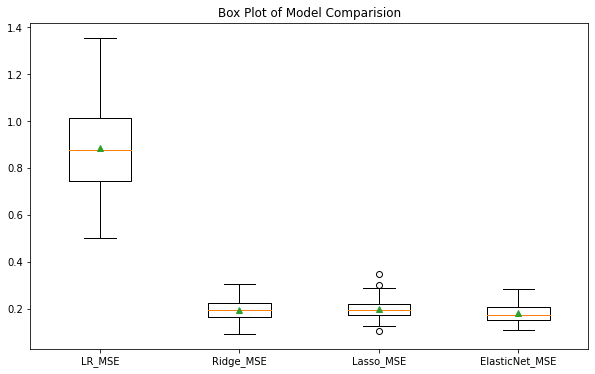

In [38]:
#MSE Boxplot
plt.figure(figsize=(10, 6))

LR_MSE = []
Ridge_MSE = []
Lasso_MSE = []
ElasticNet_MSE = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    LinearReg = LinearRegression() # Creates the function
    LinearReg.fit(X_train, y_train) # Train the model
    y_pred = LinearReg.predict(X_test)  # Predictions on testing model
    LR_MSE.append(metrics.mean_squared_error(y_test, y_pred_Test))


for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    RidgeReg = Ridge(normalize=True, alpha = 0.01) #Creates the function
    RidgeReg.fit(X_train, y_train) #Train the model
    y_pred_Test  = RidgeReg.predict(X_test)  #Predictions on testing model
    Ridge_MSE.append(metrics.mean_squared_error(y_test, y_pred_Test))


for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    LassoReg = Lasso(normalize=True, alpha = 0.01) #Creates the function
    LassoReg.fit(X_train, y_train) #Train the model
    y_pred_Test  = LassoReg.predict(X_test)  #Predictions on testing model
    Lasso_MSE.append(metrics.mean_squared_error(y_test, y_pred_Test))

    
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    ElasticNetReg = ElasticNet(normalize=True,alpha = 0.01, l1_ratio=0.5) #Creates the function
    ElasticNetReg.fit(X_train, y_train) #Train the model
    y_pred_Test  = ElasticNetReg.predict(X_test)  #Predictions on testing model
    ElasticNet_MSE.append(metrics.mean_squared_error(y_test, y_pred_Test))

labels = 'LR_MSE','Ridge_MSE','Lasso_MSE','ElasticNet_MSE'
plt.boxplot([LR_MSE, Ridge_MSE, Lasso_MSE, ElasticNet_MSE],showmeans=True ,labels = labels)


plt.title('Box Plot of Model Comparision')
plt.savefig('Boxplot_comparision.png',dpi= 80)# Save fig
plt.show()

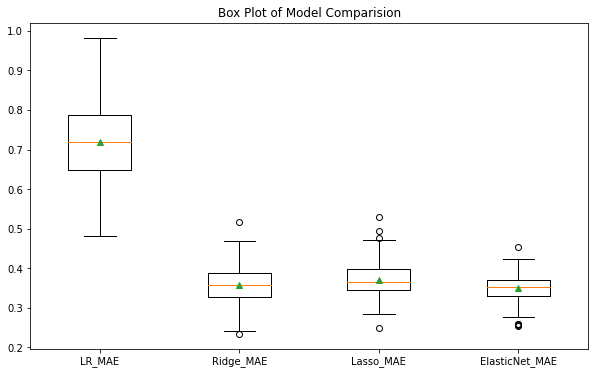

In [39]:
#MAE Boxplot
plt.figure(figsize=(10, 6))

LR_MAE = []
Ridge_MAE = []
Lasso_MAE = []
ElasticNet_MAE = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    LinearReg = LinearRegression() # Creates the function
    LinearReg.fit(X_train, y_train) # Train the model
    y_pred = LinearReg.predict(X_test)  # Predictions on testing model
    LR_MAE.append(metrics.mean_absolute_error(y_test, y_pred_Test))


for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    RidgeReg = Ridge(normalize=True, alpha = 0.01) #Creates the function
    RidgeReg.fit(X_train, y_train) #Train the model
    y_pred_Test  = RidgeReg.predict(X_test)  #Predictions on testing model
    Ridge_MAE.append(metrics.mean_absolute_error(y_test, y_pred_Test))


for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    LassoReg = Lasso(normalize=True, alpha = 0.01) #Creates the function
    LassoReg.fit(X_train, y_train) #Train the model
    y_pred_Test  = LassoReg.predict(X_test)  #Predictions on testing model
    Lasso_MAE.append(metrics.mean_absolute_error(y_test, y_pred_Test))

    
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    ElasticNetReg = ElasticNet(normalize=True,alpha = 0.01, l1_ratio=0.5) #Creates the function
    ElasticNetReg.fit(X_train, y_train) #Train the model
    y_pred_Test  = ElasticNetReg.predict(X_test)  #Predictions on testing model
    ElasticNet_MAE.append(metrics.mean_absolute_error(y_test, y_pred_Test))

labels = 'LR_MAE','Ridge_MAE','Lasso_MAE','ElasticNet_MAE'
plt.boxplot([LR_MAE, Ridge_MAE, Lasso_MAE, ElasticNet_MAE],showmeans=True ,labels = labels)


plt.title('Box Plot of Model Comparision')
plt.savefig('Boxplot_comparision.png',dpi= 80)# Save fig
plt.show()